In [1]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import random
import shutil
from collections import Counter

import Automold as am
import Helpers as hp

from data_generator import DataGenerator

data_gen = DataGenerator()

In [2]:
ROOT_DIR = "lps_cropped"  # The root directory of the datasets.
SAVE_DIR = "lps_cropped_perm"  # Where to save new generated data.

# Paths to the dirs where imgs and .txt annotations are located.
PATH_TO_IMGS = ["caltech_cars", "aolp", "english_lp", "open_alpr_eu","ufpr_alpr/training", "ufpr_alpr/validation", 
               "ufpr_alpr/testing"]

# Letters that have a low average precision (AP).
LOW_AP_LETTERS = ["G", "K", "M", "O", "Q", "S"]

# Analysis

lps_cropped/caltech_cars
Average number of digits in an LP: 3.911290322580645 , total: 485
Average number of letters in an LP: 2.411290322580645 , total: 299
Average number of low AP letters in an LP: 1.2258064516129032 , total: 152
Total characters in dataset: 936


lps_cropped/aolp
Average number of digits in an LP: 4.307655502392344 , total: 9003
Average number of letters in an LP: 1.3736842105263158 , total: 2871
Average number of low AP letters in an LP: 0.6296650717703349 , total: 1316
Total characters in dataset: 13190


lps_cropped/english_lp
Average number of digits in an LP: 3.4577603143418467 , total: 1760
Average number of letters in an LP: 2.4990176817288803 , total: 1272
Average number of low AP letters in an LP: 2.1532416502946954 , total: 1096
Total characters in dataset: 4128


lps_cropped/open_alpr_eu
Average number of digits in an LP: 3.3518518518518516 , total: 362
Average number of letters in an LP: 2.5277777777777777 , total: 273
Average number of low AP letters i

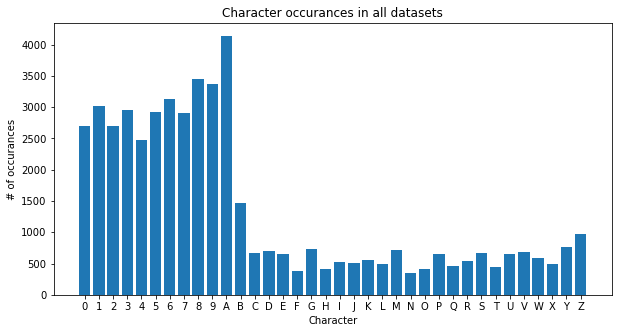

In [3]:
all_occ = Counter()  # All character occurances.
for path in PATH_TO_IMGS:
    occ = data_gen.get_chars_occ_from_imgs(f"{ROOT_DIR}/{path}", LOW_AP_LETTERS)
    all_occ += occ
    
char_count_sorted = sorted(all_occ.items(), key=lambda x: x[0])
chars = []
occurances = []

for pair in char_count_sorted:
    chars.append(pair[0])
    occurances.append(pair[1])

plt.figure(figsize=(10, 5))
plt.bar(chars, occurances)
plt.title("Character occurances in all datasets")
plt.xlabel("Character")
plt.ylabel("# of occurances")

print(char_count_sorted)

# Testing generation 

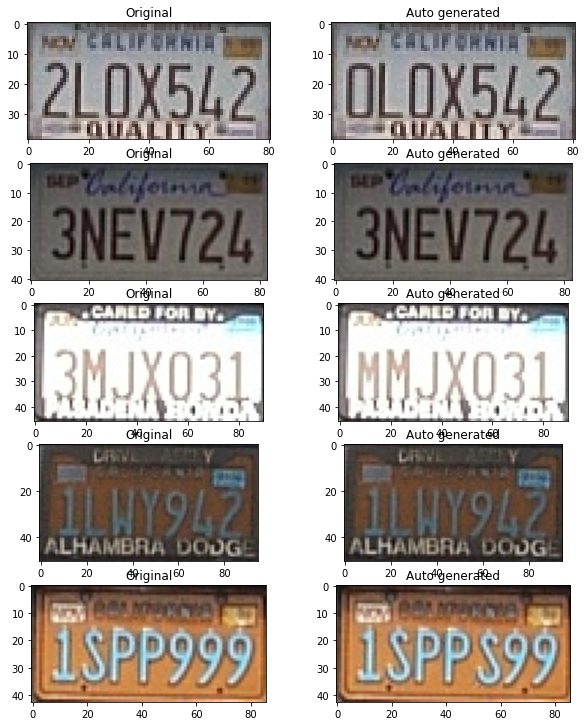

In [6]:
for path in PATH_TO_IMGS:
    data_gen.gen_permutations(f"{ROOT_DIR}/{path}",
                              SAVE_DIR,
                              LOW_AP_LETTERS,
                              samples_to_display=5,
                              exclude_a=True,
                              replace_1=False,
                              only_low_ap=True,
                              save_org=False)
    
    break

# Generation by permutations

In [9]:
for path in PATH_TO_IMGS:
    data_gen.gen_permutations(f"{ROOT_DIR}/{path}",
                              SAVE_DIR,
                              LOW_AP_LETTERS,
                              exclude_a=True,
                              replace_1=False,
                              only_low_ap=True,
                              save_org=True)
    
    print(path, "Done")

caltech_cars Done
aolp Done
english_lp Done
open_alpr_eu Done
ufpr_alpr/training Done
ufpr_alpr/validation Done
ufpr_alpr/testing Done


### Analysis after generation 

lps_cropped_t/caltech_cars
Average number of digits in an LP: 3.521276595744681 , total: 662
Average number of letters in an LP: 2.2127659574468086 , total: 416
Average number of low AP letters in an LP: 2.404255319148936 , total: 452
Total characters in dataset: 1530


lps_cropped_t/aolp
Average number of digits in an LP: 4.026835631755498 , total: 10804
Average number of letters in an LP: 1.2340663436451733 , total: 3311
Average number of low AP letters in an LP: 1.4714871412597839 , total: 3948
Total characters in dataset: 18063


lps_cropped_t/english_lp
Average number of digits in an LP: 2.8721311475409834 , total: 2628
Average number of letters in an LP: 2.398907103825137 , total: 2195
Average number of low AP letters in an LP: 3.5628415300546448 , total: 3260
Total characters in dataset: 8083


lps_cropped_t/open_alpr_eu
Average number of digits in an LP: 2.6769230769230767 , total: 522
Average number of letters in an LP: 2.533333333333333 , total: 494
Average number of low AP l

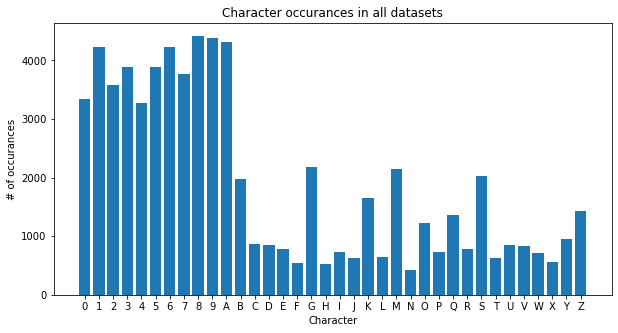

In [10]:
ROOT_DIR = "lps_cropped_perm"  # The root directory of the paths.

all_occ_after = Counter()
for path in PATH_TO_IMGS:
    occ = data_gen.get_chars_occ_from_imgs(f"{ROOT_DIR}/{path}", LOW_AP_LETTERS)
    all_occ_after += occ
    
char_count_sorted = sorted(all_occ_after.items(), key=lambda x: x[0])
chars = []
occurances = []

for pair in char_count_sorted:
    chars.append(pair[0])
    occurances.append(pair[1])

plt.figure(figsize=(10, 5))
plt.bar(chars, occurances)
plt.title("Character occurances in all datasets")
plt.xlabel("Character")
plt.ylabel("# of occurances")

print(char_count_sorted)

# Random augmentation generation

## Testing augmentations

### Original 

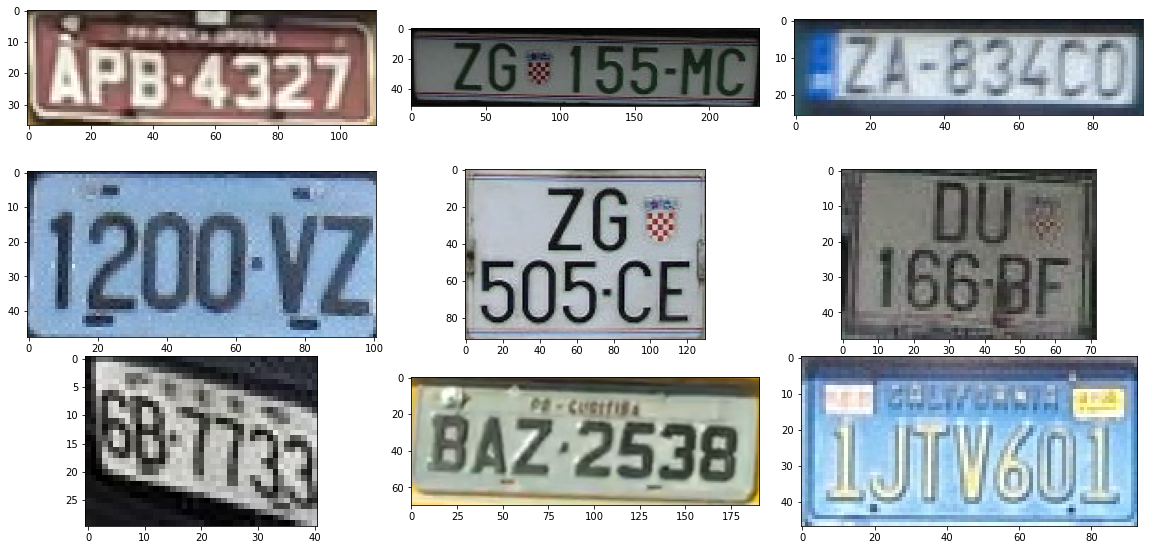

In [14]:
path='./test_imgs/*'
images= hp.load_images(path)
images = random.choices(images, k=9)
hp.visualize(images, column=3, fig_size=(20,10))

### Shadow

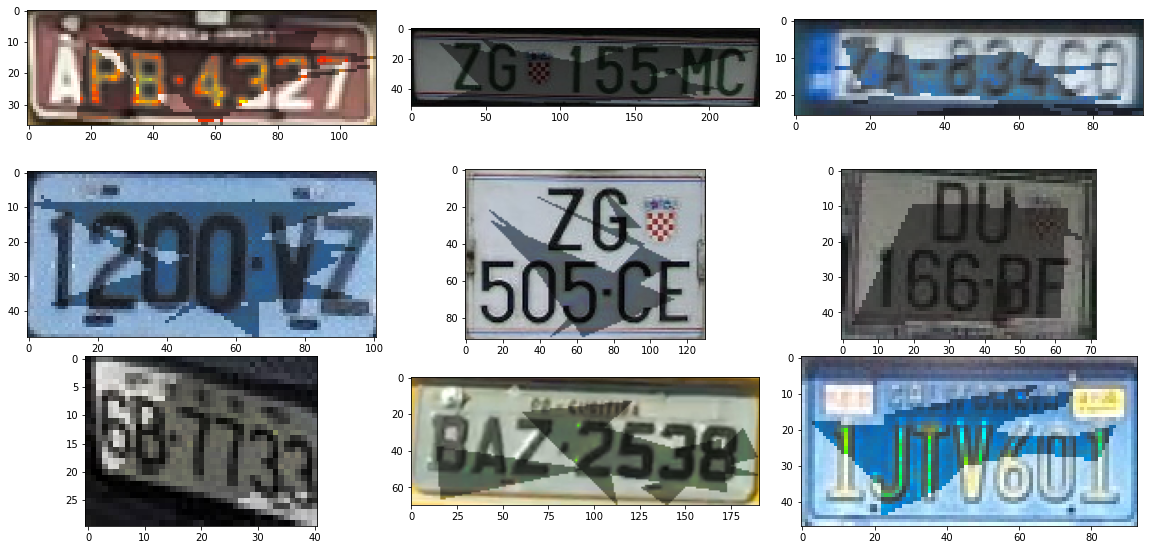

In [15]:
shadowy_images= am.add_shadow(images, no_of_shadows=4, rectangular_roi=(-1,-1,-1,-1), shadow_dimension=4)
hp.visualize(shadowy_images, column=3, fig_size=(20,10))

### Autumn

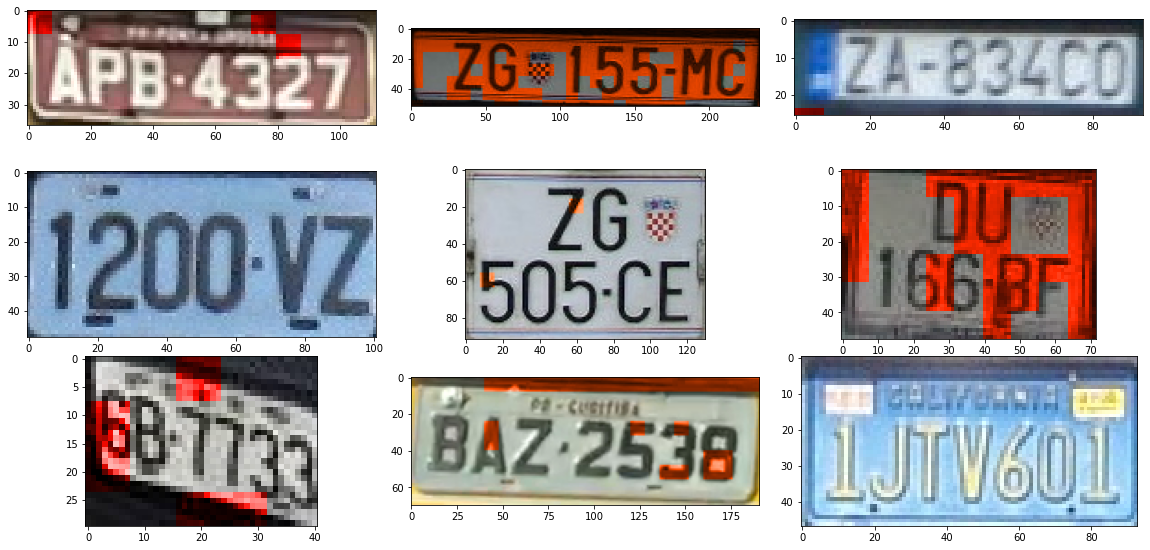

In [16]:
autmn_images = am.add_autumn(images)
hp.visualize(autmn_images, column=3, fig_size=(20,10))

### Blur

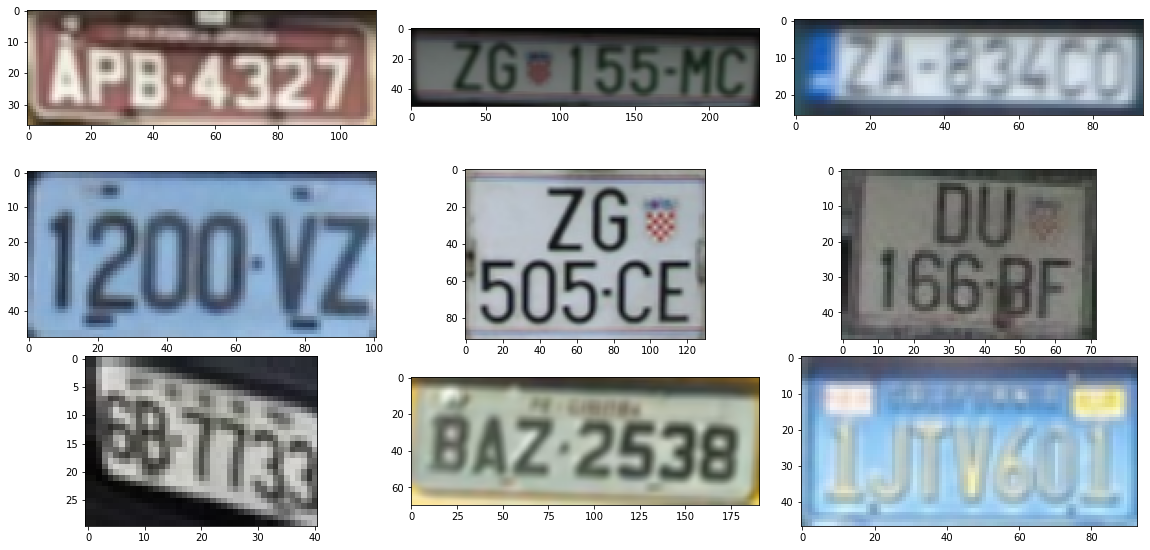

In [17]:
blurred_images = am.m_add_blur(images, low_kernel=3, high_kernel=5, w_thresh=150)
hp.visualize(blurred_images, column=3, fig_size=(20,10))

## Generating the random augmentation images 

In [3]:
ROOT_DIR = "lps_cropped"  # The root directory of the paths.
OUTPUT_DIR = "lps_cropped_gen"  # Save directory for the new generated data.

data_gen.gen_rand_aug_imgs(ROOT_DIR, PATH_TO_IMGS, LOW_AP_LETTERS, OUTPUT_DIR)

caltech_cars - number of low AP characters: 65
aolp - number of low AP characters: 593
english_lp - number of low AP characters: 406
open_alpr_eu - number of low AP characters: 87
ufpr_alpr/training - number of low AP characters: 750
ufpr_alpr/validation - number of low AP characters: 330
ufpr_alpr/testing - number of low AP characters: 720

Random data augmentation generation done
